In [1]:
import numpy as np
import matplotlib.pyplot as plt
from idanalysis.analysis import Tools

In [2]:
fmap_fname = '/home/gabriel/repos/wiggler-2T-STI/measurement/magnetic/hallprobe/gap 022.00mm/2022-08-25_WigglerSTI_022.00mm_U+0.00_D+0.00_Fieldmap_X=-20_20mm_Z=-1650_1650mm_ID=3977.dat'

In [3]:
fmap = Tools.get_fmap(fmap_fname)

In [4]:
rx, ry, rz = fmap.rx, fmap.ry, fmap.rz
bx, by, bz = fmap.bx[0], fmap.by[0], fmap.bz[0]

rz peak: -136.0 mm
b peak: 1.9819 T


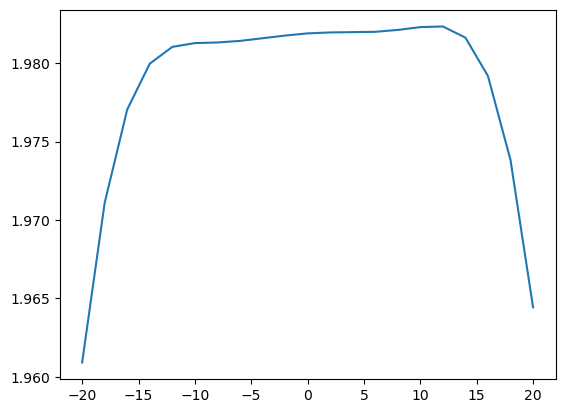

In [5]:
rt, b_rt, rzmax, roff = Tools.get_fmap_roll_off('by', fmap, 10, 180)
plt.plot(rt, b_rt)

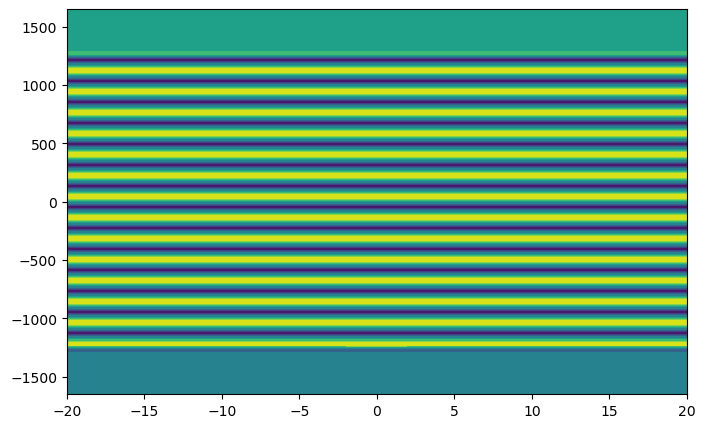

In [17]:
x, z = np.meshgrid(rx, rz)
fig = plt.figure(figsize=(8, 5))
ax = plt.axes()
contour = ax.contourf(x, z, by.T)

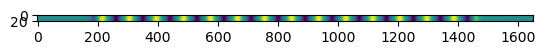

In [71]:
plt.imshow(by)

(0.0, 50.0)

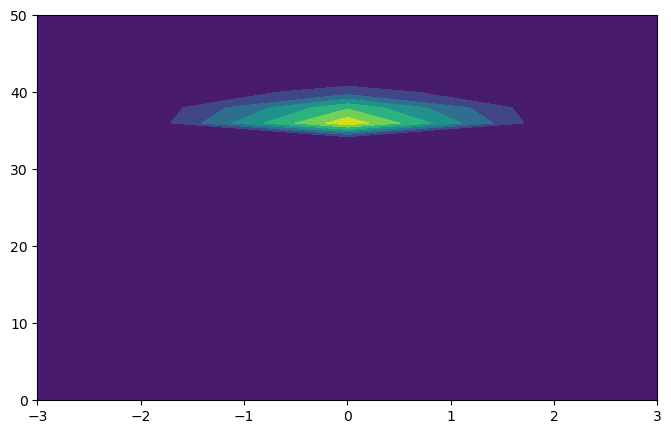

In [58]:
# Calculate Fourier transform of field
ft = np.fft.ifftshift(by)
ft = np.fft.fft2(ft)
ft = np.fft.fftshift(ft)

fig = plt.figure(figsize=(8, 5))
ax = plt.axes()
contour = ax.contourf(x, z, np.abs(ft).T)
plt.xlim(-3, 3)
plt.ylim(0, 50)

In [27]:
ft.shape

(21, 1651)

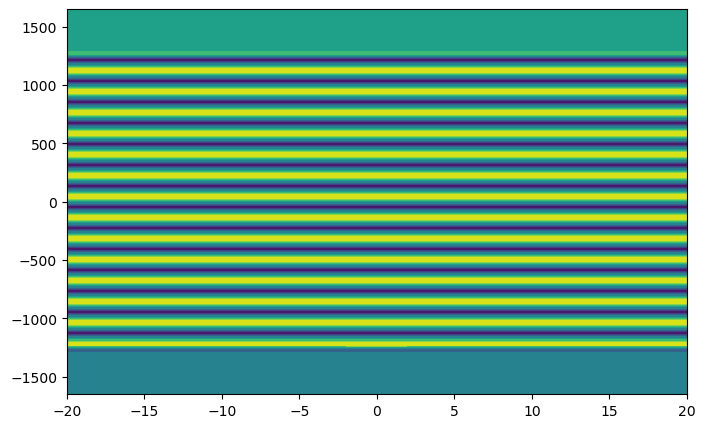

In [25]:
ift = np.fft.ifftshift(ft)
ift = np.fft.ifft2(ift)
ift = np.fft.fftshift(ift)

fig = plt.figure(figsize=(8, 5))
ax = plt.axes()
contour = ax.contourf(x, z, ift.real.T)

In [65]:
ft.shape

(21, 1651)

In [66]:
kz = 2*np.pi/180
kx = np.pi/(2*20)
by_fitted = np.zeros(ft.shape)
for i, rx0 in enumerate(rx):
    for j, rz0 in enumerate(rz):
        by_fitted[i, j] += ft[i, j]*np.exp(1j*2*np.pi*(i*rx0/21+j*rz0/1651))

/tmp/ipykernel_22841/2176887860.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  by_fitted[i, j] += ft[i, j]*np.exp(1j*2*np.pi*(i*rx0/21+j*rz0/1651))


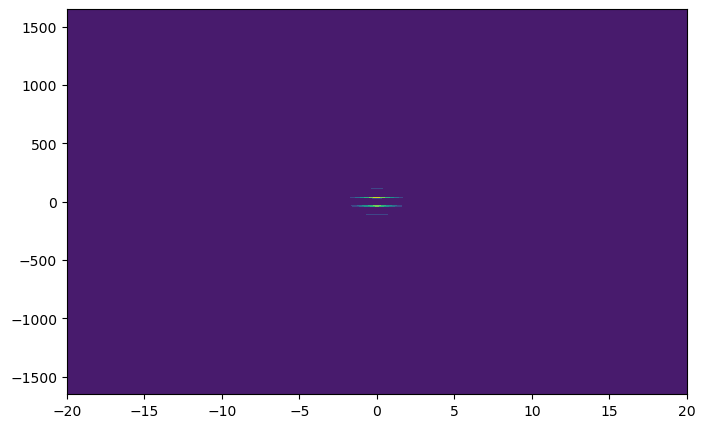

In [69]:
fig = plt.figure(figsize=(8, 5))
ax = plt.axes()
contour = ax.contourf(x, z, np.abs(by_fitted).T)